Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None

Summary Statistics:
         User ID  App Usage Time (min/day)  Scr

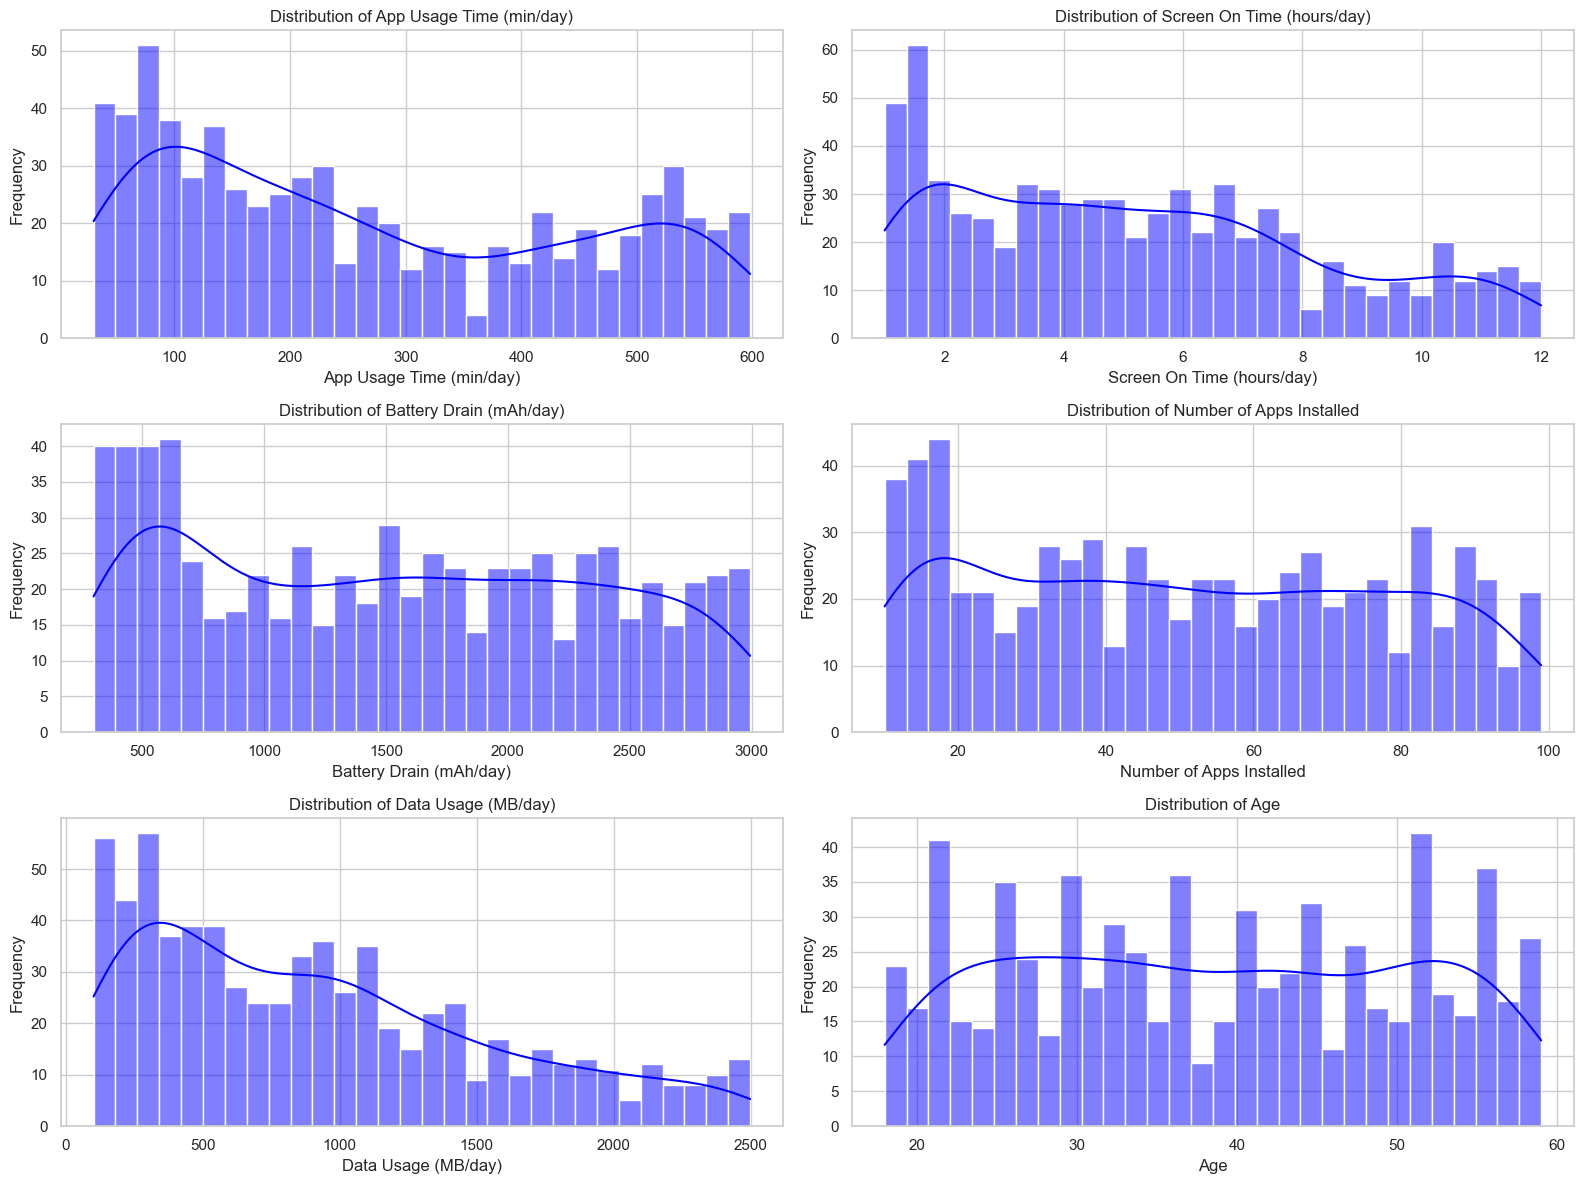

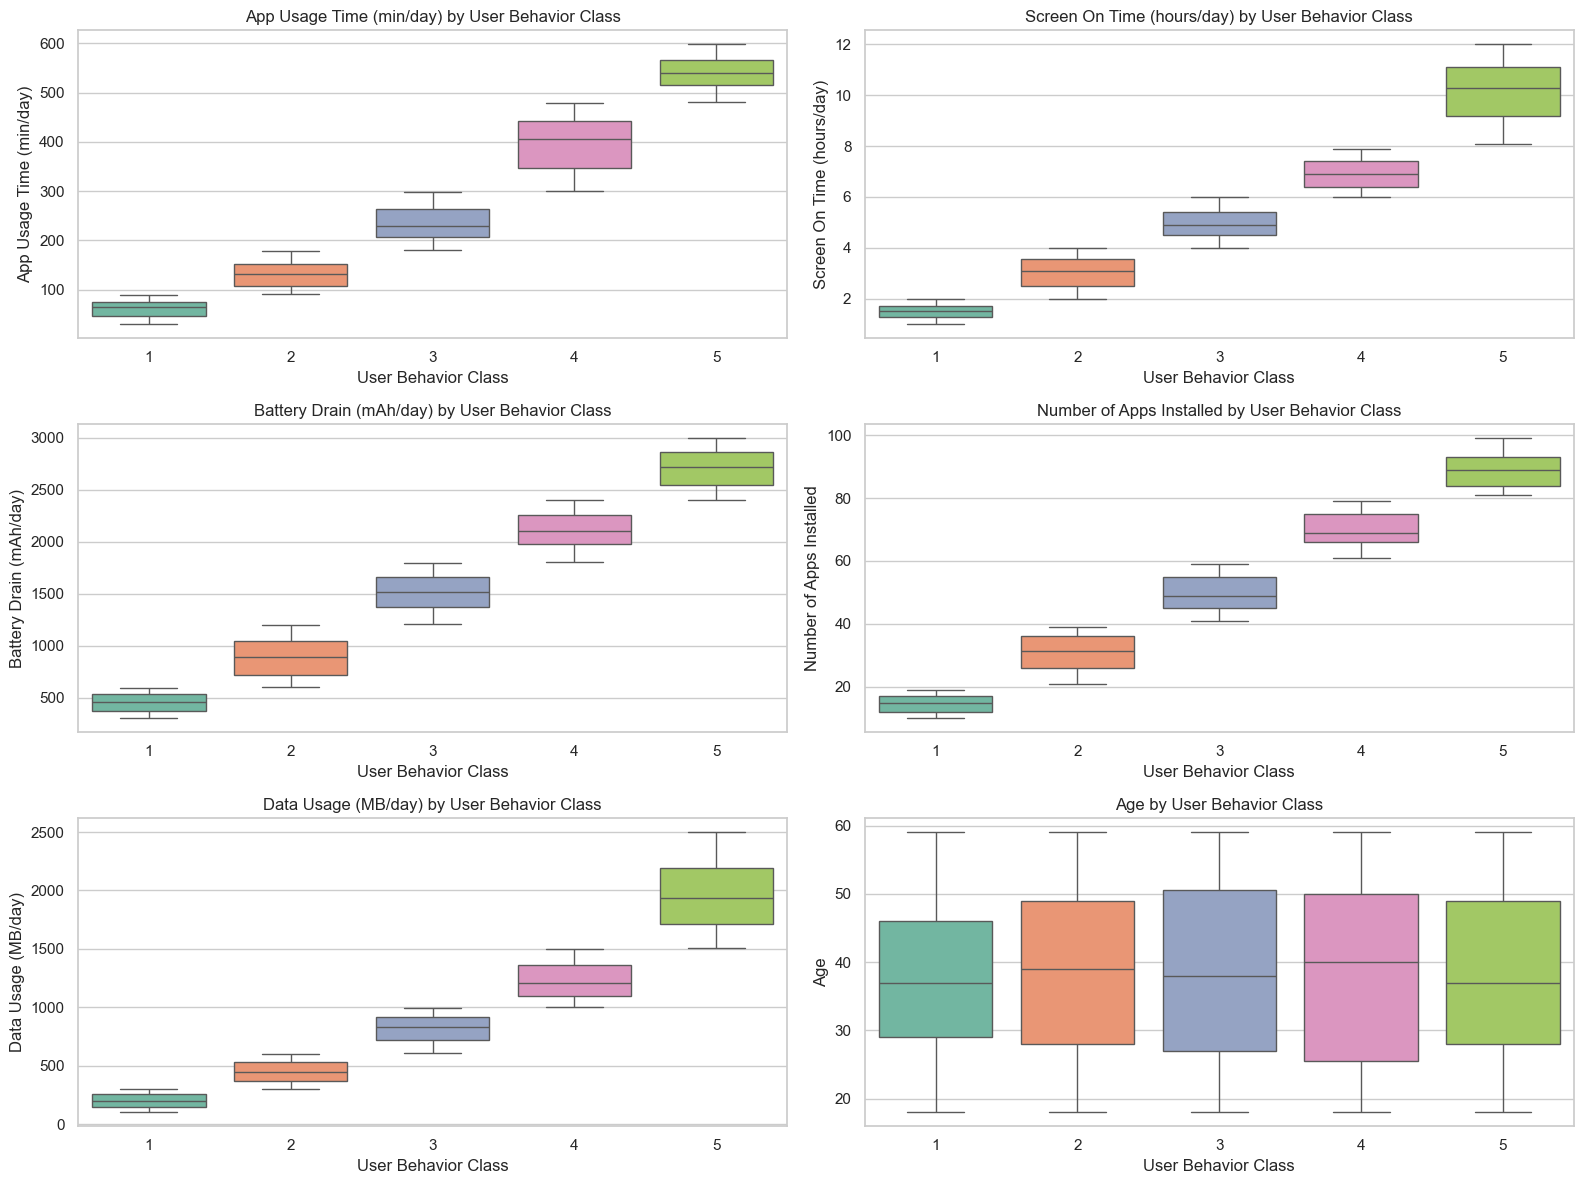

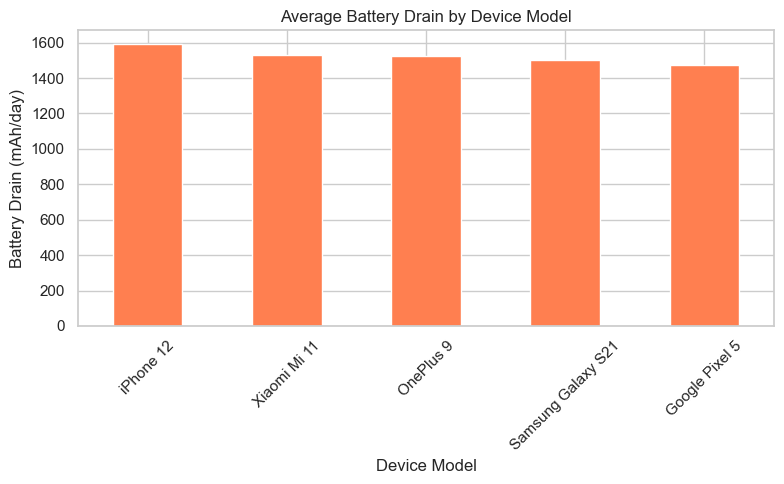

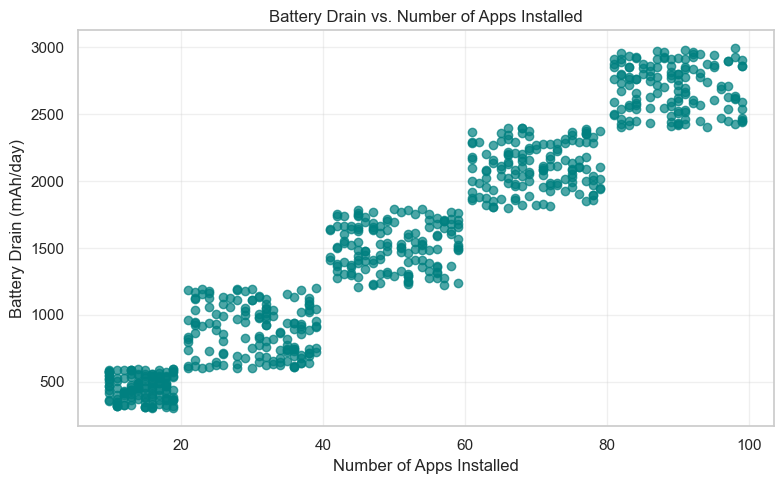

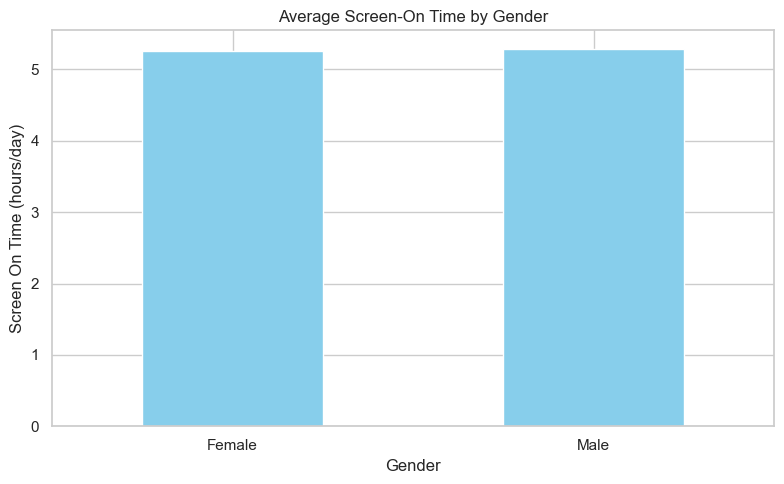

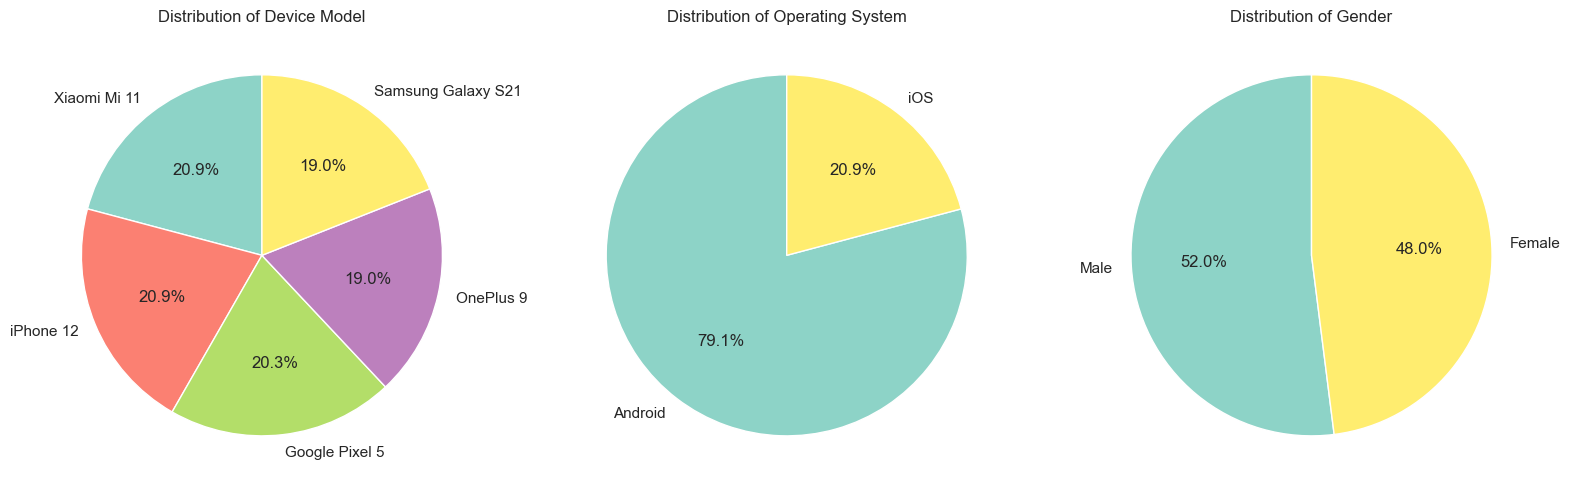

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r'C:\Users\Perdorues\Downloads\Project_Datasets\user_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Standardize column names
data.columns = data.columns.str.strip()

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")

# General statistics
print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Plot distributions of numeric variables
numeric_columns = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age",
]

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Relationship between numeric features and target variable
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="User Behavior Class", y=column, data=data, palette="Set2")
    plt.title(f"{column} by User Behavior Class")
    plt.xlabel("User Behavior Class")
    plt.ylabel(column)

plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 8))
data["Battery Drain (mAh/day)"] = pd.to_numeric(data["Battery Drain (mAh/day)"])

# Group data by device model and calculate the average battery drain
avg_battery_drain = data.groupby("Device Model")["Battery Drain (mAh/day)"].mean()

# Plot the chart
avg_battery_drain.sort_values(ascending=False).plot(kind="bar", color="coral", figsize=(8, 5))
plt.title("Average Battery Drain by Device Model")
plt.ylabel("Battery Drain (mAh/day)")
plt.xlabel("Device Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


data["Battery Drain (mAh/day)"] = pd.to_numeric(data["Battery Drain (mAh/day)"])
data["Number of Apps Installed"] = pd.to_numeric(data["Number of Apps Installed"])

# Plot the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(data["Number of Apps Installed"], data["Battery Drain (mAh/day)"], color="teal", alpha=0.7)
plt.title("Battery Drain vs. Number of Apps Installed")
plt.xlabel("Number of Apps Installed")
plt.ylabel("Battery Drain (mAh/day)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


data["Screen On Time (hours/day)"] = pd.to_numeric(data["Screen On Time (hours/day)"])

# Group data by gender and calculate the average screen-on time
avg_screen_on_time = data.groupby("Gender")["Screen On Time (hours/day)"].mean()

# Plot the chart
avg_screen_on_time.plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Average Screen-On Time by Gender")
plt.ylabel("Screen On Time (hours/day)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Categorical variables
categorical_columns = ["Device Model", "Operating System", "Gender"]

plt.figure(figsize=(16, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    data[column].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3", ax=plt.gca())
    plt.ylabel("")  # Remove default y-label from pie chart
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

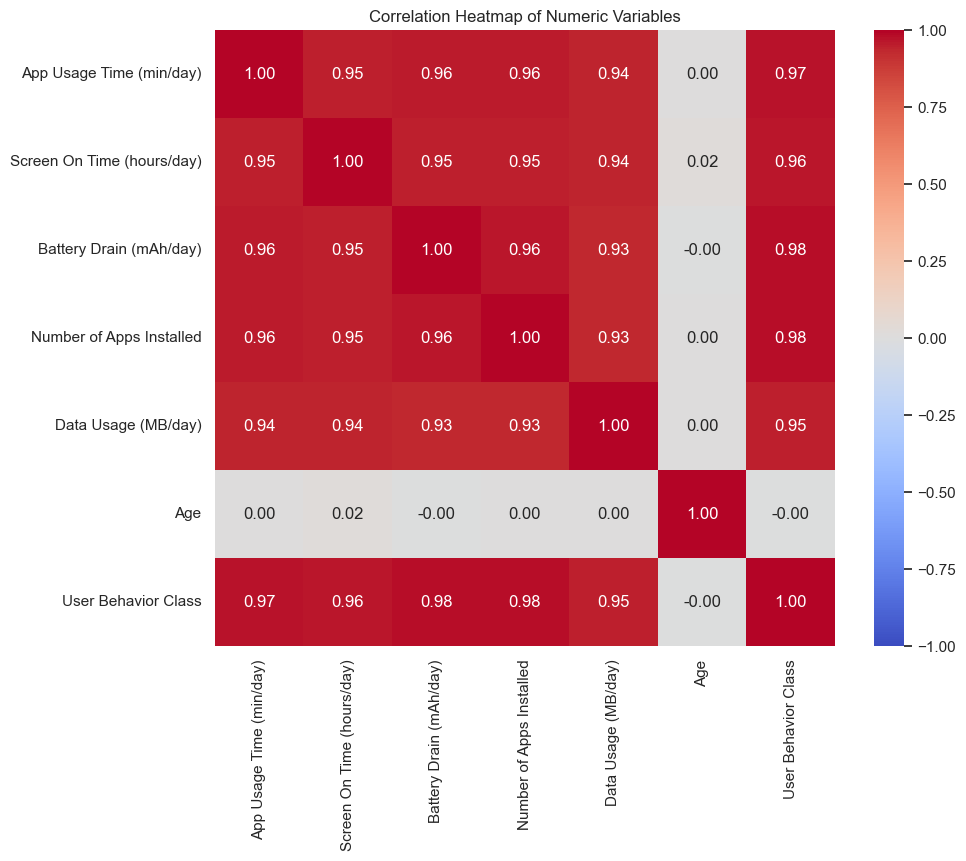

In [2]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns + ["User Behavior Class"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [3]:
# Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [4]:
# Define features and target
X = data.drop(columns=["User ID", "User Behavior Class"])
y = data["User Behavior Class"]

In [5]:

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Ensure selected_features and X_selected match
if len(selected_features) != X_selected.shape[1]:
    raise ValueError("Mismatch between selected features and transformed data.")

print("Selected Features:", selected_features)


Selected Features: Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)'],
      dtype='object')


In [6]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
# Machine Learning Modeling

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [9]:
# Best model
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_clf.predict(X_test_pca)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Accuracy Score: 1.0


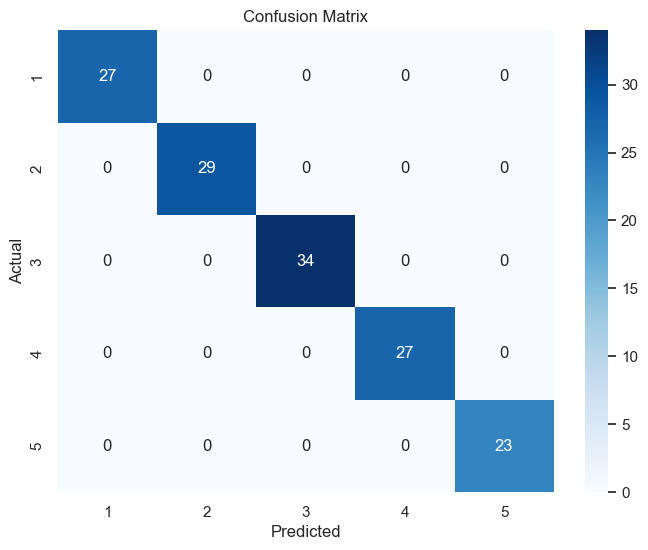

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()